# GreenVine: Early Plant Disease Detection
<hr>

## About Dataset - 
Link to the dataset: https://data.mendeley.com/datasets/89cnxc58kj/1
- Authors collected the dataset of the grapevine leaf images categorizing into two, healthy and unhealty. The images are captured manually using 2 smartphones and 1 tablet.
- The images exhibit resolution of 1920x1080 pixels and 1280x720 pixels by both portrait and landscape orientation.
- The dataset comprises of 1770 images and is structured within the main folder "esca_dataset", which containts 2 subfolders "healthy"(882 images) and "unhealthy"(888 images)    

## Solution - 
When working with deep learning alot of data is required, since the data is only 1770, image augmentation is the way to go.

    `Augmentation is the technique which transforms existing images and creates new images.`

IMAGE AUGMENTATION IS DONE IN THE `PlantDisease Augmentation.ipynb` FILE

In [5]:
import os
dataset_path = "/Users/shreyanair/GreenVine/Plant Disease"

In [6]:
num_health_images = len(os.listdir(os.path.join(dataset_path,'Healthy_new')))
num_unhealthy_images = len(os.listdir(os.path.join(dataset_path,'Unhealthy_new')))

In [7]:
print("Nnumber of healthy images", num_health_images)
print("Number of unhealthy images", num_unhealthy_images)

Nnumber of healthy images 1765
Number of unhealthy images 1777


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import os

In [9]:
labels = ['Healthy','Unhealthy']
counts = [num_health_images, num_unhealthy_images]

In [10]:
fig = px.bar(x=labels,y=counts)
fig.update_layout(
    xaxis_title = "Image Type",
    yaxis_title = "Count",
    title = "Number of healthy and unhealty images",
    width = 800,
    height = 500
)
fig.show()

In [11]:
fig = go.Figure(data = [go.Pie(labels=labels, values=counts,textinfo='percent',insidetextorientation='radial')])
fig.update_layout(
    title = "Distribution of healthy and unhealthy images",
    width = 800,
    height = 500
)
fig.show()

In [12]:
healhty_path=os.path.join(dataset_path,'Healthy_new')
unhealthy_path=os.path.join(dataset_path,'Unhealthy_new')

In [13]:
healthy_files= os.listdir(healhty_path)

In [14]:
import cv2

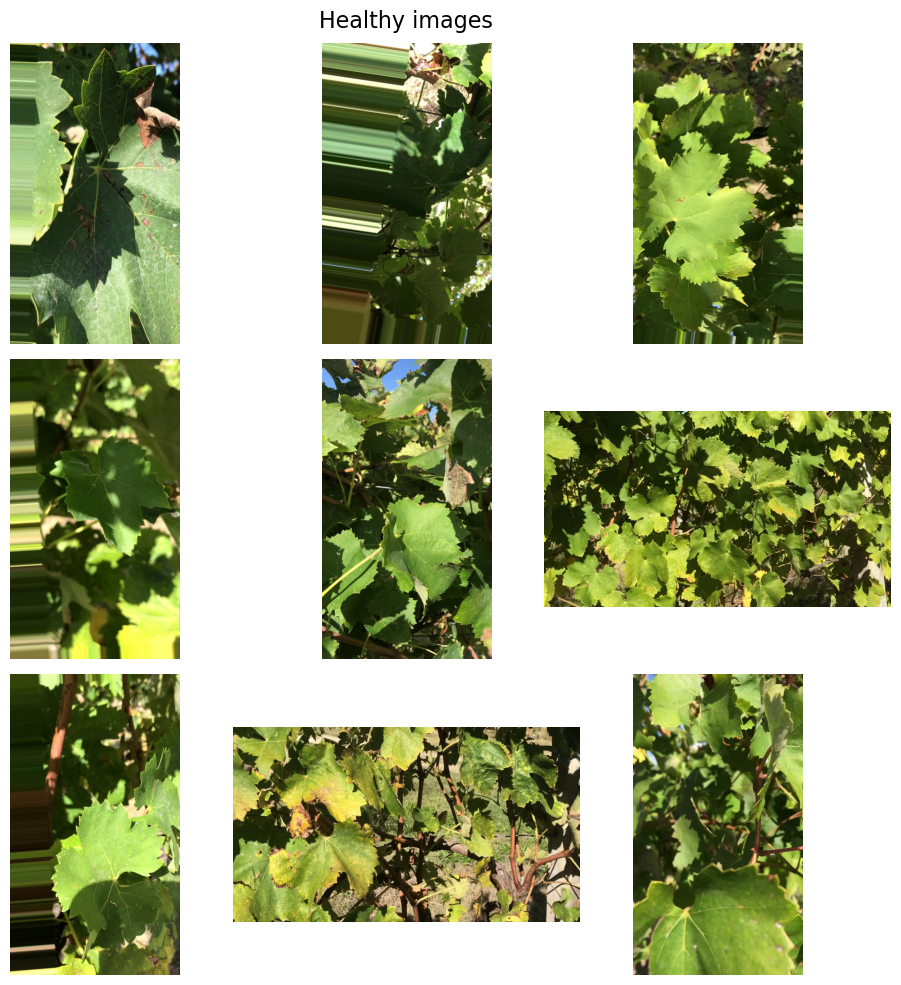

In [15]:
fig, axes = plt.subplots(3,3,figsize=(10,10))
fig.suptitle('Healthy images', fontsize=16)
axes = axes.ravel()

for i, image_file in enumerate(healthy_files[:9]):
    image_path=os.path.join(healhty_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

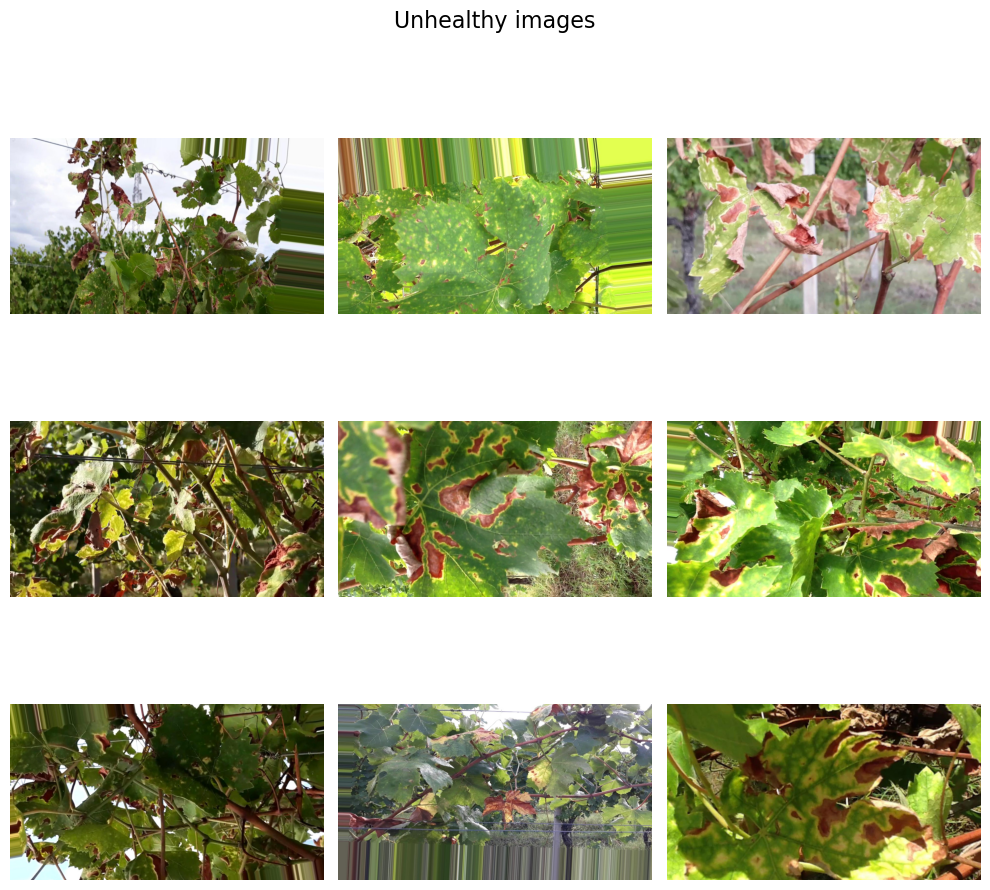

In [16]:
unhealthy_files= os.listdir(unhealthy_path)
fig, axes = plt.subplots(3,3,figsize=(10,10))
fig.suptitle('Unhealthy images', fontsize=16)
axes = axes.ravel()

for i, image_file in enumerate(unhealthy_files[:9]):
    image_path=os.path.join(unhealthy_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Image Pre-processing

In [17]:
def load_and_preprocess(image_folder):      
    image_files = os.listdir(image_folder)  #prepare list of all the images present in this folder
    images = []
    for image_file in image_files:          #Read each and every image
        image_path = os.path.join(image_folder,image_file)
        image = cv2.imread(image_path)
        if image is not None:           #When the image is found resize it to 256x256 and make it uniform
            image = cv2.resize(image,(256,256))
            images.append(image)
    return images

In [19]:
healthy_files = load_and_preprocess(os.path.join(dataset_path,'Healthy_new'))
unhealthy_files = load_and_preprocess(os.path.join(dataset_path,'Unhealthy_new'))

In [20]:
import numpy as np
healthy_files = np.array(healthy_files).reshape(-1,256,256,3)
unhealthy_files = np.array(unhealthy_files).reshape(-1,256,256,3)

<mark>In the above code we are trying to convert the image into a numpy array, where the -1 denotes that the dimension is unknown, 256 -> height ,256 -> Width is the array size and 3 is for RGB. </mark>

>-1 is given when we are not sure about the dimension that needs to be provided, numpy automatically calculate the dimension of the array. 

In [23]:
all_files = np.concatenate((healthy_files, unhealthy_files), axis=0) #axis =0 is for rows

In [24]:
all_labels = np.concatenate((np.zeros(len(healthy_files)),
                            np.ones(len(unhealthy_files)),
                            ))

_After reshaping the images we will now concatenate healthy and unhealthy into one variable. The above code labels all the healthy images as zeros and unhealthy as ones._

In [25]:
all_files_flat = all_files.reshape(-1, all_files.shape[1] * all_files.shape[2] * all_files.shape[3])

_***Flattening the numpy array*** - `all_files.shape[1] → Height ` * `all_files.shape[2] → Width` * ` all_files.shape[3] → Channel(RGB)` = `Total number of pixels present in an image`_

This is done to get the 2D array where each row represents an image and each column represents the pixel value.
